# Paths between BP solutions

Given a graph where some factors were removed to expose leaves:

- construct two basis $\mathcal{B^{(1)}}=\{v_1^{(1)},...,v_k^{(1)}\}$ and $\mathcal{B^{(2)}}=\{v_1^{(2)},...,v_k^{(2)}\}$ using leaf removal
- find 2 distinct solutions $x_1,x_2$ using BP + decimation on independent variables
- investigate a few possible paths connecting $x_1$ to $x_2$

<!-- - build $x=x_1\oplus x_2$
- find a path $P$ of "small" jumps from $0$ to $x$ by writing $x$ as a combination of basis vectors $x=\alpha^i v_i$
- obtain the corresponding path $P_1=P\oplus x_1$ going from $x_1$ to $x_2$
- plot the distortion of of the codeword along the path from $x_1$ to $x_2$ -->

In [1]:
include("../code/bp_full.jl")
include("../code/seaweed.jl")
using OffsetArrays

Build graph and remove some factors

In [2]:
include("../code/ldpc_graph.jl")
n = 7200
@show n
R = 0.3
m = round(Int, n*(1-R))
nedges, Λ, K = generate_polyn(n,m,degree_type=:nodes)
b = 1

n = 7200


1

In [3]:
Ht = ldpc_matrix(n, m, nedges, Λ, K, accept_multi_edges=false)
# remove b factors
Ht = Ht[:,1:end-b]
H = sparse(permutedims(copy(Ht)))
pleaves = proportionmap(vec(sum(H,dims=1)))[1]
println("Porportion of leaves: ", pleaves)

Porportion of leaves: 0.0004166666666666667


### Build two basis using leaf removal

We build two different basis => two sets of independent variables => use them to find 2 different BP solutions

In [4]:
B1,indep1 = findbasis(H)
@assert iszero(H*B1.%2)
dim1 = length(indep1)
dim1, n-m, b

(2161, 2160, 1)

In [5]:
B2,indep2 = findbasis(H)
@assert indep1 != indep2
@assert iszero(H*B2.%2)
dim2 = length(indep2)
dim2, n-m, b

(2161, 2160, 1)

### Find 2 BP solutions

In [26]:
# external field strength
HH = 10
s = rand((-1,1), n)
efield = [(exp(ss*HH),exp(-ss*HH)) for ss in s]
bp = BPFull(H, efield);

In [27]:
bp1 = deepcopy(bp)
bp2 = deepcopy(bp);

In [28]:
nunsat1,_,dist1 = decimate!(bp1, efield, indep1, s;  tol=1e-4, fair_decimation=true, callback=cb_decimation)

Avg distortion after 1st BP round: 0.23277817429712566
 Step    0. Free = 2161. Maxfield = -Inf. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    1. Free = 2160. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    2. Free = 2159. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    3. Free = 2158. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    4. Free = 2157. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    5. Free = 2156. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    6. Free = 2155. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    7. Free = 2154. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    8. Free = 2153. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    9. Free = 2152. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl

 Step   85. Free = 2076. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   86. Free = 2075. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   87. Free = 2074. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   88. Free = 2073. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   89. Free = 2072. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   90. Free = 2071. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   91. Free = 2070. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   92. Free = 2069. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   93. Free = 2068. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   94. Free = 2067. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   95. Free = 2066. Maxfi

 Step  171. Free = 1990. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  172. Free = 1989. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  173. Free = 1988. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  174. Free = 1987. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  175. Free = 1986. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  176. Free = 1985. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  177. Free = 1984. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  178. Free = 1983. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  179. Free = 1982. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  180. Free = 1981. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  181. Free = 1980. Maxfi

 Step  257. Free = 1904. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  258. Free = 1903. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  259. Free = 1902. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  260. Free = 1901. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  261. Free = 1900. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  262. Free = 1899. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  263. Free = 1898. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  264. Free = 1897. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  265. Free = 1896. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  266. Free = 1895. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  267. Free = 1894. Maxfi

 Step  343. Free = 1818. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  344. Free = 1817. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  345. Free = 1816. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  346. Free = 1815. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  347. Free = 1814. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  348. Free = 1813. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  349. Free = 1812. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  350. Free = 1811. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  351. Free = 1810. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  352. Free = 1809. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  353. Free = 1808. Maxfi

 Step  429. Free = 1732. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  430. Free = 1731. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  431. Free = 1730. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  432. Free = 1729. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  433. Free = 1728. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  434. Free = 1727. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  435. Free = 1726. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  436. Free = 1725. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  437. Free = 1724. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  438. Free = 1723. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  439. Free = 1722. Maxfi

 Step  515. Free = 1646. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  516. Free = 1645. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  517. Free = 1644. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  518. Free = 1643. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  519. Free = 1642. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  520. Free = 1641. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  521. Free = 1640. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  522. Free = 1639. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  523. Free = 1638. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  524. Free = 1637. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  525. Free = 1636. Maxfi

 Step  601. Free = 1560. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  602. Free = 1559. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  603. Free = 1558. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  604. Free = 1557. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  605. Free = 1556. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  606. Free = 1555. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  607. Free = 1554. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  608. Free = 1553. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  609. Free = 1552. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  610. Free = 1551. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  611. Free = 1550. Maxfi

 Step  687. Free = 1474. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  688. Free = 1473. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  689. Free = 1472. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  690. Free = 1471. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  691. Free = 1470. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  692. Free = 1469. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  693. Free = 1468. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  694. Free = 1467. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  695. Free = 1466. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  696. Free = 1465. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  697. Free = 1464. Maxfi

 Step  773. Free = 1388. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  774. Free = 1387. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  775. Free = 1386. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  776. Free = 1385. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  777. Free = 1384. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  778. Free = 1383. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  779. Free = 1382. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  780. Free = 1381. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  781. Free = 1380. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  782. Free = 1379. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  783. Free = 1378. Maxfi

 Step  859. Free = 1302. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  860. Free = 1301. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  861. Free = 1300. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  862. Free = 1299. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  863. Free = 1298. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  864. Free = 1297. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  865. Free = 1296. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  866. Free = 1295. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  867. Free = 1294. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  868. Free = 1293. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  869. Free = 1292. Maxfi

 Step  945. Free = 1216. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  946. Free = 1215. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  947. Free = 1214. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  948. Free = 1213. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  949. Free = 1212. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  950. Free = 1211. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  951. Free = 1210. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  952. Free = 1209. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  953. Free = 1208. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  954. Free = 1207. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  955. Free = 1206. Maxfi

 Step  1031. Free = 1130. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1032. Free = 1129. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1033. Free = 1128. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1034. Free = 1127. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1035. Free = 1126. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1036. Free = 1125. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1037. Free = 1124. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1038. Free = 1123. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1039. Free = 1122. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1040. Free = 1121. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1041. Free = 

 Step  1115. Free = 1046. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1116. Free = 1045. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1117. Free = 1044. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1118. Free = 1043. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1119. Free = 1042. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1120. Free = 1041. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1121. Free = 1040. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1122. Free = 1039. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1123. Free = 1038. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1124. Free = 1037. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1125. Free = 

 Step  1199. Free = 962. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1200. Free = 961. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1201. Free = 960. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1202. Free = 959. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1203. Free = 958. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1204. Free = 957. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1205. Free = 956. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1206. Free = 955. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1207. Free = 954. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1208. Free = 953. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1209. Free = 952. Maxfi

 Step  1285. Free = 876. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1286. Free = 875. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1287. Free = 874. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1288. Free = 873. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1289. Free = 872. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1290. Free = 871. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1291. Free = 870. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1292. Free = 869. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1293. Free = 868. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1294. Free = 867. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1295. Free = 866. Maxfi

 Step  1371. Free = 790. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1372. Free = 789. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1373. Free = 788. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1374. Free = 787. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1375. Free = 786. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1376. Free = 785. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1377. Free = 784. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1378. Free = 783. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1379. Free = 782. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1380. Free = 781. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1381. Free = 780. Maxfi

 Step  1457. Free = 704. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1458. Free = 703. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1459. Free = 702. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1460. Free = 701. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1461. Free = 700. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1462. Free = 699. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1463. Free = 698. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1464. Free = 697. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1465. Free = 696. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1466. Free = 695. Maxfield = 1.00E+00. ε = 6.62E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1467. Free = 694. Maxfi

 Step  1543. Free = 618. Maxfield = 9.88E-01. ε = 5.22E-05. Unsat =  83. Ovl = 0.559. Iters 61
 Step  1544. Free = 617. Maxfield = 9.87E-01. ε = 7.30E-05. Unsat =  83. Ovl = 0.559. Iters 55
 Step  1545. Free = 616. Maxfield = 9.84E-01. ε = 9.99E-05. Unsat =  83. Ovl = 0.559. Iters 57
 Step  1546. Free = 615. Maxfield = 9.84E-01. ε = 9.81E-05. Unsat =  83. Ovl = 0.559. Iters 59
 Step  1547. Free = 614. Maxfield = 9.83E-01. ε = 9.71E-05. Unsat =  83. Ovl = 0.559. Iters 54
 Step  1548. Free = 613. Maxfield = 9.83E-01. ε = 8.90E-05. Unsat =  83. Ovl = 0.559. Iters 56
 Step  1549. Free = 612. Maxfield = 1.00E+00. ε = 7.80E-05. Unsat =  83. Ovl = 0.559. Iters 3
 Step  1550. Free = 611. Maxfield = 1.00E+00. ε = 7.80E-05. Unsat =  83. Ovl = 0.559. Iters 4
 Step  1551. Free = 610. Maxfield = 1.00E+00. ε = 7.80E-05. Unsat =  83. Ovl = 0.559. Iters 1
 Step  1552. Free = 609. Maxfield = 9.82E-01. ε = 7.81E-05. Unsat =  85. Ovl = 0.559. Iters 55
 Step  1553. Free = 608. Maxfield = 9.82E-01. ε = 7.6

 Step  1631. Free = 530. Maxfield = 9.64E-01. ε = 8.92E-05. Unsat =  85. Ovl = 0.558. Iters 77
 Step  1632. Free = 529. Maxfield = 9.62E-01. ε = 9.48E-05. Unsat =  85. Ovl = 0.558. Iters 61
 Step  1633. Free = 528. Maxfield = 9.50E-01. ε = 8.17E-05. Unsat =  85. Ovl = 0.558. Iters 85
 Step  1634. Free = 527. Maxfield = 9.46E-01. ε = 8.41E-05. Unsat =  85. Ovl = 0.558. Iters 82
 Step  1635. Free = 526. Maxfield = 9.44E-01. ε = 7.60E-05. Unsat =  85. Ovl = 0.558. Iters 84
 Step  1636. Free = 525. Maxfield = 1.00E+00. ε = 7.60E-05. Unsat =  85. Ovl = 0.558. Iters 1
 Step  1637. Free = 524. Maxfield = 9.72E-01. ε = 9.58E-05. Unsat =  85. Ovl = 0.558. Iters 61
 Step  1638. Free = 523. Maxfield = 9.42E-01. ε = 8.95E-05. Unsat =  85. Ovl = 0.558. Iters 82
 Step  1639. Free = 522. Maxfield = 1.00E+00. ε = 6.99E-05. Unsat =  85. Ovl = 0.558. Iters 5
 Step  1640. Free = 521. Maxfield = 1.00E+00. ε = 5.93E-05. Unsat =  85. Ovl = 0.558. Iters 7
 Step  1641. Free = 520. Maxfield = 1.00E+00. ε = 5.9

 Step  1727. Free = 434. Maxfield = 1.00E+00. ε = 8.58E-06. Unsat =  59. Ovl = 0.551. Iters 1
 Step  1728. Free = 433. Maxfield = 1.00E+00. ε = 4.94E-06. Unsat =  59. Ovl = 0.551. Iters 8
 Step  1729. Free = 432. Maxfield = 1.00E+00. ε = 3.95E-06. Unsat =  59. Ovl = 0.551. Iters 7
 Step  1730. Free = 431. Maxfield = 1.00E+00. ε = 2.95E-06. Unsat =  59. Ovl = 0.551. Iters 4
 Step  1731. Free = 430. Maxfield = 1.00E+00. ε = 2.95E-06. Unsat =  59. Ovl = 0.551. Iters 1
 Step  1732. Free = 429. Maxfield = 1.00E+00. ε = 2.18E-06. Unsat =  59. Ovl = 0.551. Iters 6
 Step  1733. Free = 428. Maxfield = 9.21E-01. ε = 8.01E-05. Unsat =  55. Ovl = 0.549. Iters 168
 Step  1734. Free = 427. Maxfield = 1.00E+00. ε = 8.01E-05. Unsat =  55. Ovl = 0.549. Iters 1
 Step  1735. Free = 426. Maxfield = 1.00E+00. ε = 8.04E-05. Unsat =  55. Ovl = 0.549. Iters 6
 Step  1736. Free = 425. Maxfield = 1.00E+00. ε = 7.57E-05. Unsat =  55. Ovl = 0.549. Iters 1
 Step  1737. Free = 424. Maxfield = 1.00E+00. ε = 6.13E-05

 Step  1829. Free = 332. Maxfield = 1.00E+00. ε = 7.79E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1830. Free = 331. Maxfield = 1.00E+00. ε = 7.96E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1831. Free = 330. Maxfield = 1.00E+00. ε = 7.96E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1832. Free = 329. Maxfield = 1.00E+00. ε = 6.54E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1833. Free = 328. Maxfield = 1.00E+00. ε = 6.54E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1834. Free = 327. Maxfield = 1.00E+00. ε = 5.80E-07. Unsat =  41. Ovl = 0.546. Iters 1
 Step  1835. Free = 326. Maxfield = 9.16E-01. ε = 6.54E-05. Unsat =  43. Ovl = 0.546. Iters 109
 Step  1836. Free = 325. Maxfield = 1.00E+00. ε = 5.83E-05. Unsat =  43. Ovl = 0.546. Iters 3
 Step  1837. Free = 324. Maxfield = 1.00E+00. ε = 3.82E-05. Unsat =  43. Ovl = 0.546. Iters 5
 Step  1838. Free = 323. Maxfield = 1.00E+00. ε = 2.67E-05. Unsat =  43. Ovl = 0.546. Iters 4
 Step  1839. Free = 322. Maxfield = 1.00E+00. ε = 2.67E-05

 Step  1919. Free = 242. Maxfield = 1.00E+00. ε = 9.87E-05. Unsat =  33. Ovl = 0.542. Iters 11
 Step  1920. Free = 241. Maxfield = 1.00E+00. ε = 9.87E-05. Unsat =  33. Ovl = 0.542. Iters 1
 Step  1921. Free = 240. Maxfield = 8.80E-01. ε = 7.00E-05. Unsat =  31. Ovl = 0.541. Iters 291
 Step  1922. Free = 239. Maxfield = 1.00E+00. ε = 7.00E-05. Unsat =  31. Ovl = 0.541. Iters 1
 Step  1923. Free = 238. Maxfield = 1.00E+00. ε = 4.51E-05. Unsat =  31. Ovl = 0.541. Iters 9
 Step  1924. Free = 237. Maxfield = 1.00E+00. ε = 4.51E-05. Unsat =  31. Ovl = 0.541. Iters 1
 Step  1925. Free = 236. Maxfield = 1.00E+00. ε = 4.51E-05. Unsat =  31. Ovl = 0.541. Iters 1
 Step  1926. Free = 235. Maxfield = 1.00E+00. ε = 3.30E-05. Unsat =  31. Ovl = 0.541. Iters 6
 Step  1927. Free = 234. Maxfield = 1.00E+00. ε = 3.30E-05. Unsat =  31. Ovl = 0.541. Iters 1
 Step  1928. Free = 233. Maxfield = 1.00E+00. ε = 2.18E-05. Unsat =  31. Ovl = 0.541. Iters 7
 Step  1929. Free = 232. Maxfield = 1.00E+00. ε = 2.18E-0

 Step  2009. Free = 152. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat =  17. Ovl = 0.537. Iters 8
 Step  2010. Free = 151. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat =  19. Ovl = 0.538. Iters 1
 Step  2011. Free = 150. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat =  15. Ovl = 0.537. Iters 10
 Step  2012. Free = 149. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat =  17. Ovl = 0.537. Iters 1
 Step  2013. Free = 148. Maxfield = 1.00E+00. ε = 8.46E-05. Unsat =  17. Ovl = 0.537. Iters 18
 Step  2014. Free = 147. Maxfield = 1.00E+00. ε = 8.09E-05. Unsat =  17. Ovl = 0.537. Iters 5
 Step  2015. Free = 146. Maxfield = 1.00E+00. ε = 8.09E-05. Unsat =  17. Ovl = 0.537. Iters 1
 Step  2016. Free = 145. Maxfield = 1.00E+00. ε = 5.59E-05. Unsat =  15. Ovl = 0.538. Iters 11
 Step  2017. Free = 144. Maxfield = 1.00E+00. ε = 5.59E-05. Unsat =  17. Ovl = 0.537. Iters 1
 Step  2018. Free = 143. Maxfield = 1.00E+00. ε = 5.59E-05. Unsat =  17. Ovl = 0.538. Iters 1
 Step  2019. Free = 142. Maxfield = 1.00E+00. ε = 5.59E-0

 Step  2097. Free =  64. Maxfield = 7.23E-01. ε = 3.42E-05. Unsat =  39. Ovl = 0.536. Iters 93
 Step  2098. Free =  63. Maxfield = 1.00E+00. ε = 3.42E-05. Unsat =  39. Ovl = 0.536. Iters 1
 Step  2099. Free =  62. Maxfield = 1.00E+00. ε = 1.73E-09. Unsat =  39. Ovl = 0.536. Iters 17
 Step  2100. Free =  61. Maxfield = 1.00E+00. ε = 2.06E-09. Unsat =  39. Ovl = 0.536. Iters 8
 Step  2101. Free =  60. Maxfield = 1.00E+00. ε = 2.06E-09. Unsat =  39. Ovl = 0.536. Iters 1
 Step  2102. Free =  59. Maxfield = 6.67E-01. ε = 6.87E-10. Unsat =  37. Ovl = 0.535. Iters 47
 Step  2103. Free =  58. Maxfield = 1.00E+00. ε = 4.12E-09. Unsat =  37. Ovl = 0.535. Iters 5
 Step  2104. Free =  57. Maxfield = 1.00E+00. ε = 4.12E-09. Unsat =  37. Ovl = 0.536. Iters 22
 Step  2105. Free =  56. Maxfield = 1.00E+00. ε = 4.12E-09. Unsat =  37. Ovl = 0.534. Iters 4
 Step  2106. Free =  55. Maxfield = 1.00E+00. ε = 4.12E-09. Unsat =  37. Ovl = 0.535. Iters 1
 Step  2107. Free =  54. Maxfield = 1.00E+00. ε = 4.12E-

(0, 0.5333333333333333, 0.23333333333333334)

In [29]:
nunsat2,_,dist2 = decimate!(bp2, efield, indep2, s;  tol=1e-4, fair_decimation=true, callback=cb_decimation)

Avg distortion after 1st BP round: 0.23277817429712566
 Step    0. Free = 2161. Maxfield = -Inf. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    1. Free = 2160. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    2. Free = 2159. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    3. Free = 2158. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    4. Free = 2157. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    5. Free = 2156. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    6. Free = 2155. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    7. Free = 2154. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    8. Free = 2153. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step    9. Free = 2152. Maxfield = 1.00E+00. ε = 6.69E-01. Unsat =  83. Ovl

 Step   85. Free = 2076. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   86. Free = 2075. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   87. Free = 2074. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   88. Free = 2073. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   89. Free = 2072. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   90. Free = 2071. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   91. Free = 2070. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   92. Free = 2069. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   93. Free = 2068. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   94. Free = 2067. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step   95. Free = 2066. Maxfi

 Step  171. Free = 1990. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  172. Free = 1989. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  173. Free = 1988. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  174. Free = 1987. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  175. Free = 1986. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  176. Free = 1985. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  177. Free = 1984. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  178. Free = 1983. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  179. Free = 1982. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  180. Free = 1981. Maxfield = 1.00E+00. ε = 6.68E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  181. Free = 1980. Maxfi

 Step  257. Free = 1904. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  258. Free = 1903. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  259. Free = 1902. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  260. Free = 1901. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  261. Free = 1900. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  262. Free = 1899. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  263. Free = 1898. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  264. Free = 1897. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  265. Free = 1896. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  266. Free = 1895. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  267. Free = 1894. Maxfi

 Step  343. Free = 1818. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  344. Free = 1817. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  345. Free = 1816. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  346. Free = 1815. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  347. Free = 1814. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  348. Free = 1813. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  349. Free = 1812. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  350. Free = 1811. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  351. Free = 1810. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  352. Free = 1809. Maxfield = 1.00E+00. ε = 6.67E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  353. Free = 1808. Maxfi

 Step  429. Free = 1732. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  430. Free = 1731. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  431. Free = 1730. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  432. Free = 1729. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  433. Free = 1728. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  434. Free = 1727. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  435. Free = 1726. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  436. Free = 1725. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  437. Free = 1724. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  438. Free = 1723. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  439. Free = 1722. Maxfi

 Step  515. Free = 1646. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  516. Free = 1645. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  517. Free = 1644. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  518. Free = 1643. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  519. Free = 1642. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  520. Free = 1641. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  521. Free = 1640. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  522. Free = 1639. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  523. Free = 1638. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  524. Free = 1637. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  525. Free = 1636. Maxfi

 Step  601. Free = 1560. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  602. Free = 1559. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  603. Free = 1558. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  604. Free = 1557. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  605. Free = 1556. Maxfield = 1.00E+00. ε = 6.66E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  606. Free = 1555. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  607. Free = 1554. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  608. Free = 1553. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  609. Free = 1552. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  610. Free = 1551. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  611. Free = 1550. Maxfi

 Step  687. Free = 1474. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  688. Free = 1473. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  689. Free = 1472. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  690. Free = 1471. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  691. Free = 1470. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  692. Free = 1469. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  693. Free = 1468. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  694. Free = 1467. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  695. Free = 1466. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  696. Free = 1465. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  697. Free = 1464. Maxfi

 Step  773. Free = 1388. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  774. Free = 1387. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  775. Free = 1386. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  776. Free = 1385. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  777. Free = 1384. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  778. Free = 1383. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  779. Free = 1382. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  780. Free = 1381. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  781. Free = 1380. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  782. Free = 1379. Maxfield = 1.00E+00. ε = 6.65E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  783. Free = 1378. Maxfi

 Step  859. Free = 1302. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  860. Free = 1301. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  861. Free = 1300. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  862. Free = 1299. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  863. Free = 1298. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  864. Free = 1297. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  865. Free = 1296. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  866. Free = 1295. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  867. Free = 1294. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  868. Free = 1293. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  869. Free = 1292. Maxfi

 Step  945. Free = 1216. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  946. Free = 1215. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  947. Free = 1214. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  948. Free = 1213. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  949. Free = 1212. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  950. Free = 1211. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  951. Free = 1210. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  952. Free = 1209. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  953. Free = 1208. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  954. Free = 1207. Maxfield = 1.00E+00. ε = 6.64E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  955. Free = 1206. Maxfi

 Step  1031. Free = 1130. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1032. Free = 1129. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1033. Free = 1128. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1034. Free = 1127. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1035. Free = 1126. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1036. Free = 1125. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1037. Free = 1124. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1038. Free = 1123. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1039. Free = 1122. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1040. Free = 1121. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1041. Free = 

 Step  1115. Free = 1046. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1116. Free = 1045. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1117. Free = 1044. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1118. Free = 1043. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1119. Free = 1042. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1120. Free = 1041. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1121. Free = 1040. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1122. Free = 1039. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1123. Free = 1038. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1124. Free = 1037. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1125. Free = 

 Step  1199. Free = 962. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1200. Free = 961. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1201. Free = 960. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1202. Free = 959. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1203. Free = 958. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1204. Free = 957. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1205. Free = 956. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1206. Free = 955. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1207. Free = 954. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1208. Free = 953. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1209. Free = 952. Maxfi

 Step  1285. Free = 876. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1286. Free = 875. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1287. Free = 874. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1288. Free = 873. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1289. Free = 872. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1290. Free = 871. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1291. Free = 870. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1292. Free = 869. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1293. Free = 868. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1294. Free = 867. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1295. Free = 866. Maxfi

 Step  1371. Free = 790. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1372. Free = 789. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1373. Free = 788. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1374. Free = 787. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1375. Free = 786. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1376. Free = 785. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1377. Free = 784. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1378. Free = 783. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1379. Free = 782. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1380. Free = 781. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1381. Free = 780. Maxfi

 Step  1457. Free = 704. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1458. Free = 703. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1459. Free = 702. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1460. Free = 701. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1461. Free = 700. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1462. Free = 699. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1463. Free = 698. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1464. Free = 697. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1465. Free = 696. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1466. Free = 695. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1467. Free = 694. Maxfi

 Step  1543. Free = 618. Maxfield = 1.00E+00. ε = 6.63E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1544. Free = 617. Maxfield = 9.97E-01. ε = 4.59E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1545. Free = 616. Maxfield = 1.00E+00. ε = 4.59E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1546. Free = 615. Maxfield = 9.97E-01. ε = 4.59E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1547. Free = 614. Maxfield = 9.96E-01. ε = 4.59E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1548. Free = 613. Maxfield = 1.00E+00. ε = 4.59E-01. Unsat =  83. Ovl = 0.558. Iters 1000
 Step  1549. Free = 612. Maxfield = 9.95E-01. ε = 4.75E-05. Unsat =  81. Ovl = 0.558. Iters 11
 Step  1550. Free = 611. Maxfield = 9.92E-01. ε = 7.59E-05. Unsat =  81. Ovl = 0.558. Iters 61
 Step  1551. Free = 610. Maxfield = 9.92E-01. ε = 8.03E-05. Unsat =  81. Ovl = 0.558. Iters 80
 Step  1552. Free = 609. Maxfield = 9.92E-01. ε = 8.62E-05. Unsat =  81. Ovl = 0.558. Iters 61
 Step  1553. Free = 608. Maxfield = 9.

 Step  1631. Free = 530. Maxfield = 1.00E+00. ε = 9.69E-05. Unsat =  85. Ovl = 0.559. Iters 5
 Step  1632. Free = 529. Maxfield = 9.49E-01. ε = 9.49E-05. Unsat =  85. Ovl = 0.559. Iters 75
 Step  1633. Free = 528. Maxfield = 1.00E+00. ε = 6.68E-05. Unsat =  85. Ovl = 0.559. Iters 6
 Step  1634. Free = 527. Maxfield = 1.00E+00. ε = 5.50E-05. Unsat =  85. Ovl = 0.559. Iters 5
 Step  1635. Free = 526. Maxfield = 9.47E-01. ε = 5.43E-05. Unsat =  85. Ovl = 0.559. Iters 76
 Step  1636. Free = 525. Maxfield = 9.43E-01. ε = 7.44E-05. Unsat =  85. Ovl = 0.559. Iters 69
 Step  1637. Free = 524. Maxfield = 1.00E+00. ε = 4.41E-05. Unsat =  85. Ovl = 0.559. Iters 7
 Step  1638. Free = 523. Maxfield = 1.00E+00. ε = 4.41E-05. Unsat =  85. Ovl = 0.559. Iters 1
 Step  1639. Free = 522. Maxfield = 9.41E-01. ε = 9.37E-05. Unsat =  85. Ovl = 0.559. Iters 60
 Step  1640. Free = 521. Maxfield = 9.41E-01. ε = 9.16E-05. Unsat =  83. Ovl = 0.558. Iters 86
 Step  1641. Free = 520. Maxfield = 9.40E-01. ε = 9.22E

 Step  1719. Free = 442. Maxfield = 9.12E-01. ε = 8.22E-05. Unsat =  71. Ovl = 0.554. Iters 83
 Step  1720. Free = 441. Maxfield = 1.00E+00. ε = 6.81E-05. Unsat =  71. Ovl = 0.554. Iters 5
 Step  1721. Free = 440. Maxfield = 1.00E+00. ε = 2.93E-05. Unsat =  71. Ovl = 0.554. Iters 4
 Step  1722. Free = 439. Maxfield = 9.08E-01. ε = 8.46E-05. Unsat =  73. Ovl = 0.554. Iters 100
 Step  1723. Free = 438. Maxfield = 9.05E-01. ε = 8.68E-05. Unsat =  69. Ovl = 0.554. Iters 132
 Step  1724. Free = 437. Maxfield = 1.00E+00. ε = 6.98E-05. Unsat =  69. Ovl = 0.554. Iters 1
 Step  1725. Free = 436. Maxfield = 1.00E+00. ε = 4.05E-05. Unsat =  69. Ovl = 0.554. Iters 7
 Step  1726. Free = 435. Maxfield = 1.00E+00. ε = 3.59E-05. Unsat =  69. Ovl = 0.554. Iters 3
 Step  1727. Free = 434. Maxfield = 1.00E+00. ε = 1.30E-05. Unsat =  69. Ovl = 0.554. Iters 14
 Step  1728. Free = 433. Maxfield = 1.00E+00. ε = 1.30E-05. Unsat =  69. Ovl = 0.554. Iters 3
 Step  1729. Free = 432. Maxfield = 1.00E+00. ε = 1.30

 Step  1807. Free = 354. Maxfield = 1.00E+00. ε = 8.30E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1808. Free = 353. Maxfield = 1.00E+00. ε = 8.30E-06. Unsat =  53. Ovl = 0.549. Iters 3
 Step  1809. Free = 352. Maxfield = 1.00E+00. ε = 8.30E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1810. Free = 351. Maxfield = 1.00E+00. ε = 4.98E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1811. Free = 350. Maxfield = 1.00E+00. ε = 4.10E-06. Unsat =  53. Ovl = 0.549. Iters 4
 Step  1812. Free = 349. Maxfield = 1.00E+00. ε = 4.10E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1813. Free = 348. Maxfield = 1.00E+00. ε = 4.10E-06. Unsat =  53. Ovl = 0.549. Iters 3
 Step  1814. Free = 347. Maxfield = 1.00E+00. ε = 3.07E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1815. Free = 346. Maxfield = 1.00E+00. ε = 3.07E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1816. Free = 345. Maxfield = 1.00E+00. ε = 3.07E-06. Unsat =  53. Ovl = 0.549. Iters 1
 Step  1817. Free = 344. Maxfield = 1.00E+00. ε = 2.76E-06. 

 Step  1899. Free = 262. Maxfield = 8.41E-01. ε = 6.23E-05. Unsat =  37. Ovl = 0.545. Iters 198
 Step  1900. Free = 261. Maxfield = 1.00E+00. ε = 3.82E-05. Unsat =  37. Ovl = 0.545. Iters 14
 Step  1901. Free = 260. Maxfield = 1.00E+00. ε = 3.82E-05. Unsat =  37. Ovl = 0.545. Iters 1
 Step  1902. Free = 259. Maxfield = 1.00E+00. ε = 1.53E-05. Unsat =  37. Ovl = 0.545. Iters 23
 Step  1903. Free = 258. Maxfield = 1.00E+00. ε = 1.37E-05. Unsat =  37. Ovl = 0.545. Iters 1
 Step  1904. Free = 257. Maxfield = 1.00E+00. ε = 4.13E-06. Unsat =  37. Ovl = 0.545. Iters 45
 Step  1905. Free = 256. Maxfield = 1.00E+00. ε = 3.98E-06. Unsat =  37. Ovl = 0.545. Iters 1
 Step  1906. Free = 255. Maxfield = 1.00E+00. ε = 3.18E-06. Unsat =  37. Ovl = 0.545. Iters 5
 Step  1907. Free = 254. Maxfield = 1.00E+00. ε = 2.91E-06. Unsat =  37. Ovl = 0.545. Iters 5
 Step  1908. Free = 253. Maxfield = 1.00E+00. ε = 2.73E-06. Unsat =  37. Ovl = 0.545. Iters 1
 Step  1909. Free = 252. Maxfield = 1.00E+00. ε = 2.73E

 Step  1987. Free = 174. Maxfield = 8.39E-01. ε = 6.33E-05. Unsat =  25. Ovl = 0.541. Iters 168
 Step  1988. Free = 173. Maxfield = 1.00E+00. ε = 6.33E-05. Unsat =  25. Ovl = 0.541. Iters 8
 Step  1989. Free = 172. Maxfield = 1.00E+00. ε = 4.60E-05. Unsat =  25. Ovl = 0.541. Iters 6
 Step  1990. Free = 171. Maxfield = 1.00E+00. ε = 4.60E-05. Unsat =  25. Ovl = 0.541. Iters 6
 Step  1991. Free = 170. Maxfield = 1.00E+00. ε = 1.77E-05. Unsat =  25. Ovl = 0.541. Iters 6
 Step  1992. Free = 169. Maxfield = 1.00E+00. ε = 1.80E-05. Unsat =  25. Ovl = 0.541. Iters 7
 Step  1993. Free = 168. Maxfield = 1.00E+00. ε = 1.80E-05. Unsat =  25. Ovl = 0.541. Iters 1
 Step  1994. Free = 167. Maxfield = 1.00E+00. ε = 1.16E-05. Unsat =  25. Ovl = 0.541. Iters 5
 Step  1995. Free = 166. Maxfield = 1.00E+00. ε = 5.13E-06. Unsat =  25. Ovl = 0.541. Iters 32
 Step  1996. Free = 165. Maxfield = 1.00E+00. ε = 2.39E-06. Unsat =  25. Ovl = 0.541. Iters 23
 Step  1997. Free = 164. Maxfield = 1.00E+00. ε = 7.56E-

 Step  2075. Free =  86. Maxfield = 1.00E+00. ε = 8.91E-05. Unsat =   9. Ovl = 0.537. Iters 11
 Step  2076. Free =  85. Maxfield = 1.00E+00. ε = 8.91E-05. Unsat =   9. Ovl = 0.537. Iters 1
 Step  2077. Free =  84. Maxfield = 1.00E+00. ε = 6.18E-05. Unsat =   9. Ovl = 0.537. Iters 17
 Step  2078. Free =  83. Maxfield = 1.00E+00. ε = 5.18E-05. Unsat =   9. Ovl = 0.537. Iters 7
 Step  2079. Free =  82. Maxfield = 1.00E+00. ε = 4.74E-05. Unsat =   9. Ovl = 0.537. Iters 1
 Step  2080. Free =  81. Maxfield = 8.36E-01. ε = 9.88E-05. Unsat =   9. Ovl = 0.537. Iters 342
 Step  2081. Free =  80. Maxfield = 1.00E+00. ε = 9.88E-05. Unsat =   9. Ovl = 0.537. Iters 3
 Step  2082. Free =  79. Maxfield = 1.00E+00. ε = 6.02E-05. Unsat =   9. Ovl = 0.537. Iters 26
 Step  2083. Free =  78. Maxfield = 1.00E+00. ε = 4.51E-05. Unsat =   9. Ovl = 0.537. Iters 13
 Step  2084. Free =  77. Maxfield = 1.00E+00. ε = 4.51E-05. Unsat =   9. Ovl = 0.537. Iters 1
 Step  2085. Free =  76. Maxfield = 1.00E+00. ε = 4.51

(0, 0.533611111111111, 0.23319444444444445)

In [30]:
x1 = argmax.(bp1.belief) .== 2
@assert sum(H*x1 .% 2) == 0
x2 = argmax.(bp2.belief) .== 2
@assert sum(H*x2 .% 2) == 0

Compute $x=x_1\oplus x_2$ and check that they are indeed two different codewords

In [31]:
x = xor.(x1,x2)
@assert sum(H*x .% 2) == 0
println("x1 and x2 are at Hamming distance ", sum(x))

x1 and x2 are at Hamming distance 715


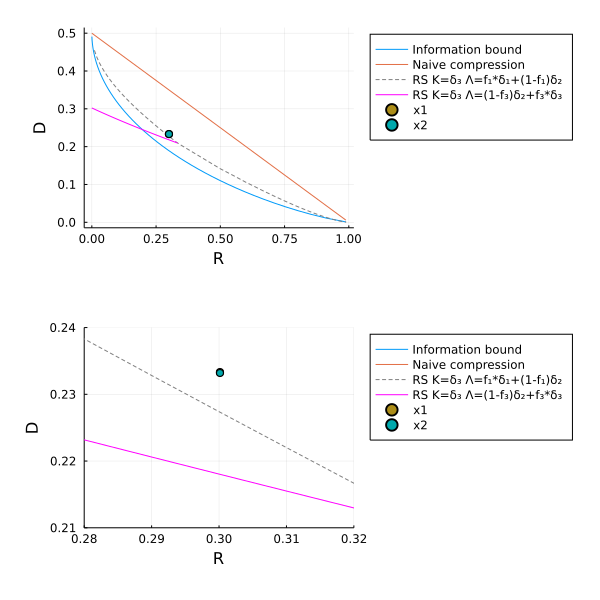

In [32]:
Rtrue = dim1/n
pl = plot_rdb()
scatter!(pl, [Rtrue], [dist1], label="x1")
scatter!(pl, [Rtrue], [dist2], label="x2")
plot(pl, size=(400,300))
pl2 = deepcopy(pl)
xlims!((0.28,0.32)); ylims!((0.21,0.24))
plot(pl2,pl, size=(600,600), margin=5*Plots.mm, layout=(2,1), legend=:outertopright)

## Find paths
We build four kinds of paths

### 1. Path along codewords
- build $x=x_1\oplus x_2$
- find a path $P$ of "small" jumps from $0$ to $x$ by writing $x$ as a combination of basis vectors $x=\alpha^i v_i$: $P=(0,v_1,v_1\oplus v_2,v_1\oplus v_2 \oplus v_3,\dots,x)$
- obtain the corresponding path $P_1=P\oplus x_1$ going from $x_1$ to $x_2$

To find the expansion coefficients $\alpha$ of $x$ on the basis, solve $B\alpha=x$:
- Build $A=[B |x]$
- Reduce it with row operations to 
                                   |   | |
                                   | I |α|
                                   |___|_|
                                   | 0 |0|

In [ ]:
B = B1
A = ([B x])
A,dep = gfrrefGF2!(A)
dropzeros!(A)
α = A[dep,end]
@assert B*α.%2 == x
sum(α)

Build path from $0$ to $x$ by accumulating each small jump via a $\oplus$ operation

In [44]:
function build_path(B, alpha, x)
    n = length(x)
    nz_alpha = findall(alpha)
    P = falses(n,length(nz_alpha)+1)
    for (i,a) in enumerate(nz_alpha)
        P[:,i+1] .= xor.(P[:,i], B[:,a])
    end
    @assert P[:,end] == x
    P
end

build_path (generic function with 1 method)

### 2. "Greedy" low-distortion path along codewords
Same as above but each time you add a basis vector, pick the one that gives the smallest distortion w.r.t. the source

In [45]:
# build path picking at each step the basis vector that gives the
#  lowest distortion wrt the source `y`
function build_lowdist_path(B, alpha, x, y)
    n = length(x)
    nz_alpha = findall(alpha)
    P = falses(n,length(nz_alpha)+1)
    for i in 1:length(nz_alpha)
        # pick next 
        j = argmin([sum(B[:,a].!=y) for a in nz_alpha])
        a = nz_alpha[j]
        P[:,i+1] .= xor.(P[:,i], B[:,a])
        deleteat!(nz_alpha, j)
    end
    @assert P[:,end] == x
    P
end

build_lowdist_path (generic function with 1 method)

### 3. "Shortest path" without staying on codewords
Go from $x_1$ to $x_2$ by simply flipping one by one the disagreing spins, in arbitrary order. It won't be a path made of codewords

In [46]:
# build path by simply flipping the disagreing spins in arbitrary order
#  => it won't be a path of codewords
function build_shortest_path(x1, x2)
    disag = findall(x1.!=x2)
    n = length(x1)
    P = falses(n, length(disag)+1)
    P[:,1] .= x1
    for i in eachindex(disag)
        P[:,i+1] .= P[:,i]
        P[disag[i],i+1] = !P[disag[i],i+1]
    end
    P
end

build_shortest_path (generic function with 1 method)

### 4. "Worst shortest path" without staying on codewords
Same as above but flip first the spins in $x_1$ not aligned with the source

In [47]:
# flip the disagreeing spins one by one, but starting with the ones in which x1 agrees with the source y
function build_worst_shortest_path(x1, x2, y)
    disag = findall(x1.!=x2)
    # sort disagreing spins putting first the ones aligned with y
    sort!(disag, by=i->x1[i]==y[i], rev=true)
    n = length(x1)
    P = falses(n, length(disag)+1)
    P[:,1] .= x1
    for i in eachindex(disag)
        P[:,i+1] .= P[:,i]
        P[disag[i],i+1] = !P[disag[i],i+1]
    end
    P
end

build_worst_shortest_path (generic function with 1 method)

In [48]:
Pa = build_path(B, α, x)
Pb = build_lowdist_path(B, α, x, xor.(s.==-1,x1))
Pc = build_shortest_path(x1,x2)
Pd = build_worst_shortest_path(x1,x2,s.==-1);

### Observe the distortion
<!-- To go from path $P=(0,\dots,x)$ to $P_1=(x_1,\dots,x_2)$, just do $P_1=P\oplus x_1$ -->

In [49]:
P1a = reduce(hcat, [xor.(Pa[:,i],x1) for i in 1:size(Pa,2)])
@assert P1a[:,end]==x2
P1b = reduce(hcat, [xor.(Pb[:,i],x1) for i in 1:size(Pb,2)])
@assert P1b[:,end]==x2

In [50]:
da = [distortion(s, 1 .- 2p) for p in eachcol(P1a)]
dx1a = [sum(x1.!=p) for p in eachcol(P1a)]
db = [distortion(s, 1 .- 2p) for p in eachcol(P1b)]
dx1b = [sum(x1.!=p) for p in eachcol(P1b)]
dc = [distortion(s, 1 .- 2p) for p in eachcol(Pc)]
dx1c = [sum(x1.!=p) for p in eachcol(Pc)]
dd = [distortion(s, 1 .- 2p) for p in eachcol(Pd)]
dx1d = [sum(x1.!=p) for p in eachcol(Pd)];

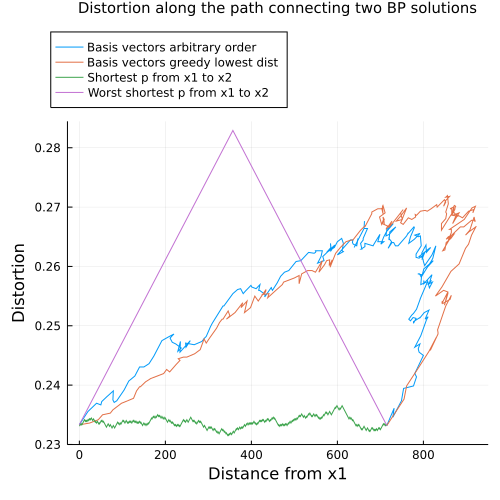

In [51]:
pl = plot()
plot!(pl, dx1a, da, label="Basis vectors arbitrary order")
plot!(pl, dx1b, db, label="Basis vectors greedy lowest dist")
plot!(pl, dx1c, dc, label="Shortest p from x1 to x2")
plot!(pl, dx1d, dd, label="Worst shortest p from x1 to x2")
xlabel!("Distance from x1"); ylabel!("Distortion")
title!("Distortion along the path connecting two BP solutions")
plot!(titlefontsize=10, legend=:outertop, size=(500,500))